In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [155]:
df = pd.read_csv('dataset/sales_data.csv')

In [156]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index(df.columns[0], inplace = True)

<Axes: xlabel='Month', ylabel='Sales'>

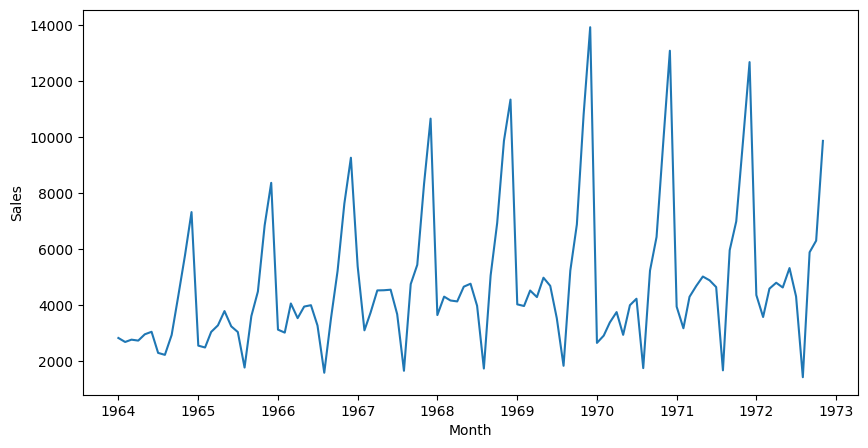

In [157]:
plt.figure(figsize = (10,5))
sns.lineplot(data = df, x = df.index, y = df.Sales)

In [158]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [159]:
adfuller_test(df['Sales'])

ADF Test Statistic : -2.0074377543766038
p-value : 0.28332145564894307
#Lags Used : 11
Number of Observations Used : 95
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [160]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(12)

<Axes: xlabel='Month'>

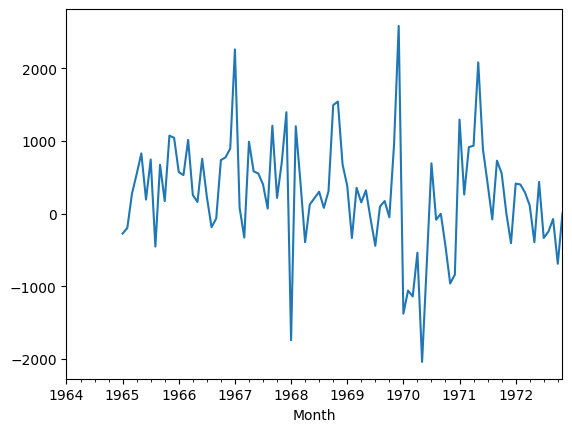

In [161]:
df['Sales First Difference'].plot()

In [162]:
adfuller_test(df['Sales First Difference'].dropna())

ADF Test Statistic : -7.656216405759757
p-value : 1.7362379632824232e-11
#Lags Used : 0
Number of Observations Used : 94
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


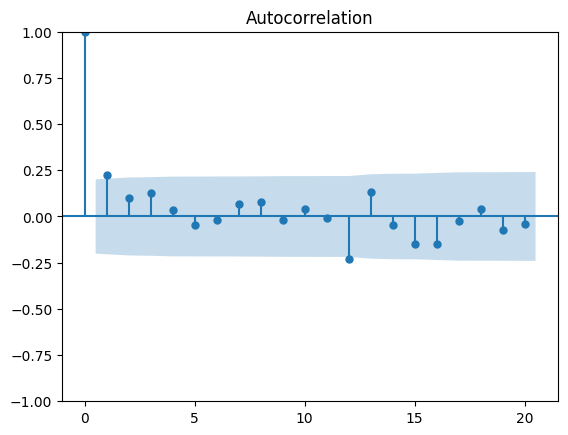

In [163]:
plot_acf(df['Sales First Difference'].dropna(),lags=20);

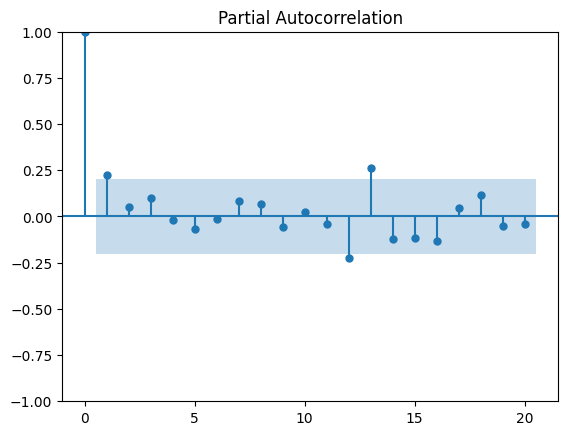

In [164]:
plot_pacf(df['Sales First Difference'].dropna(),lags=20);

In [165]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(df['Sales'], order = (1, 1, 1), seasonal_order = (1,1,1,12))
model_fit = model.fit()

C:\Users\prosa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\prosa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

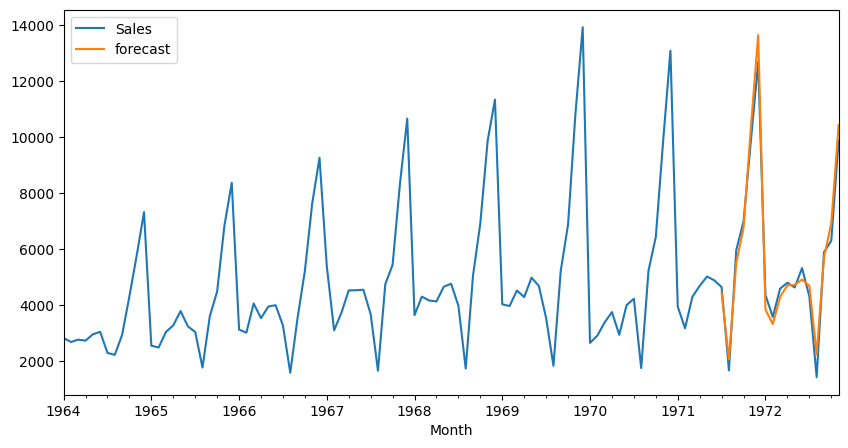

In [166]:
df['forecast'] = model_fit.predict(start = 90, end = 108,dynamic = True)
df[['Sales','forecast']].plot(figsize = (10, 5))

In [167]:
df.iloc[-12:]

,Sales,Sales First Difference,forecast
Month,,,
1971-12-01,12670,-406.0,13632.360409
1972-01-01,4348,414.0,3828.446516
1972-02-01,3564,402.0,3311.168826
1972-03-01,4577,291.0,4281.457841
1972-04-01,4788,112.0,4696.638907
1972-05-01,4618,-392.0,4709.482649
1972-06-01,5312,438.0,4901.905473
1972-07-01,4298,-335.0,4678.689071
1972-08-01,1413,-246.0,2229.023394


In [168]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(df['Sales'].iloc[-12:], df['forecast'].iloc[-12:]))

507.62142451008043

In [169]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months = x)for x in range(0, 24)]
future_datest_df = pd.DataFrame(index = future_dates[1:], columns = df.columns)
future_df = pd.concat([df,future_datest_df])

C:\Users\prosa\AppData\Local\Temp\ipykernel_6588\1728429219.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df = pd.concat([df,future_datest_df])


<Axes: >

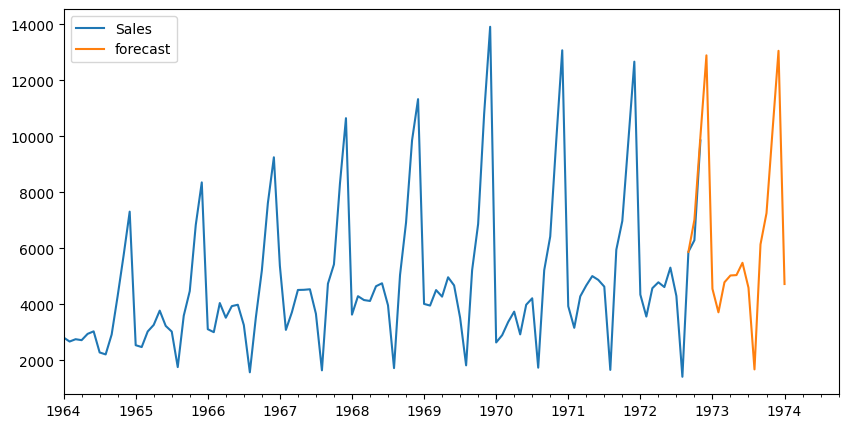

In [170]:
future_df['forecast'] = model_fit.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize = (10, 5)) 